+ In This File we have used Scaled dataset for our models
+ Models in this file are listed below
    + 1). Exponential Smoothing Model
    + 2). Prophet Model
    + 3). Auto Ensemble Model(in it we have used Exponential Smoothing Model and Prophet Model)

In [1]:
import shutup
shutup.please()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objects as go

%matplotlib inline

In [3]:
import plotly.io as pio
# For interactive graph Uncomment " pio.renderers.default = 'notebook' " and and comment " pio.renderers.default = 'png' "
# And then rerun the file on Jupyter Notebook


# pio.renderers.default = 'notebook'
pio.renderers.default = 'png'

In [4]:
# Extract Data from yfinance
import yfinance as yf
import datetime as dttm

startDate = dttm.datetime(2011, 1, 1)
endDate = dttm.datetime(2022, 7, 1)

GetData = yf.Ticker("NESTLEIND.NS")
# print(GetData.history(start=startDate, end=endDate))

yf_data = pd.DataFrame(GetData.history(start=startDate, end=endDate))
yf_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,3315.502203,3334.762854,3282.076883,3313.040771,5256,0.0,0
2011-01-04,3312.306145,3368.360472,3282.076493,3361.191895,21916,0.0,0
2011-01-05,3345.990545,3398.633281,3330.875719,3369.267334,32381,0.0,0
2011-01-06,3368.447209,3410.768726,3286.395290,3311.270020,16829,0.0,0
2011-01-07,3290.713555,3342.535815,3257.892789,3273.396240,30854,0.0,0


In [5]:
data = yf_data.copy()
data = data.asfreq('B')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,3315.502203,3334.762854,3282.076883,3313.040771,5256.0,0.0,0.0
2011-01-04,3312.306145,3368.360472,3282.076493,3361.191895,21916.0,0.0,0.0
2011-01-05,3345.990545,3398.633281,3330.875719,3369.267334,32381.0,0.0,0.0
2011-01-06,3368.447209,3410.768726,3286.395290,3311.270020,16829.0,0.0,0.0
2011-01-07,3290.713555,3342.535815,3257.892789,3273.396240,30854.0,0.0,0.0


In [6]:
data.shape

(2999, 7)

In [7]:
data.ffill(inplace=True)

In [8]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
final_data = pd.DataFrame(data.Close)
final_data.head()

,Close
Date,
2011-01-03,3313.040771
2011-01-04,3361.191895
2011-01-05,3369.267334
2011-01-06,3311.270020
2011-01-07,3273.396240


In [10]:
n =final_data['2020-01-01':'2022-06-30'].count()

In [11]:
train_data = final_data.iloc[:len(final_data)-652] 
test_data = final_data.iloc[len(final_data)-652:]
train_data.shape, test_data.shape

((2347, 1), (652, 1))

In [12]:
test_data, train_data

(                   Close
 Date                    
 2020-01-01  14215.090820
 2020-01-02  14167.287109
 2020-01-03  14036.717773
 2020-01-06  13866.520508
 2020-01-07  13745.424805
 ...                  ...
 2022-06-24  17231.650391
 2022-06-27  17358.250000
 2022-06-28  17403.900391
 2022-06-29  17499.050781
 2022-06-30  17470.000000
 
 [652 rows x 1 columns],
                    Close
 Date                    
 2011-01-03   3313.040771
 2011-01-04   3361.191895
 2011-01-05   3369.267334
 2011-01-06   3311.270020
 2011-01-07   3273.396240
 ...                  ...
 2019-12-25  14029.409180
 2019-12-26  14042.151367
 2019-12-27  14104.578125
 2019-12-30  14285.162109
 2019-12-31  14221.151367
 
 [2347 rows x 1 columns])

In [13]:
from sklearn.metrics import mean_squared_error

def error(data1, data2):
    mse = mean_squared_error(data1, data2)
    rmse = np.sqrt(mse)
    
    print('Errors :-')
    print('MSE : ',mse)
    print('RMSE : ',rmse,'\n')
    return mse, rmse

# Data Transformation

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0.001,1))
train_data_minmax = scaler.fit_transform(np.array(train_data).reshape(-1,1))

In [16]:
train_data_minmax

array([[0.04812572],
       [0.05226311],
       [0.05295699],
       ...,
       [0.97538763],
       [0.99090429],
       [0.98540418]])

In [17]:
train_data_minmax = pd.DataFrame(train_data_minmax, columns = ['close'])
train_data_minmax

,close
0,0.048126
1,0.052263
2,0.052957
3,0.047974
4,0.044719
...,...
2342,0.968929
2343,0.970024
2344,0.975388
2345,0.990904


In [18]:
# train_data_min=scaler.inverse_transform(train_data_minmax)

In [19]:
# train_data_min = pd.DataFrame(train_data_min, columns = ['close'])
# train_data_min

In [20]:
# train_data_minmax.index = train_data.index
# train_data_minmax

In [21]:
# Using plotly.express
import plotly.express as px

px.defaults.template = "ggplot2"

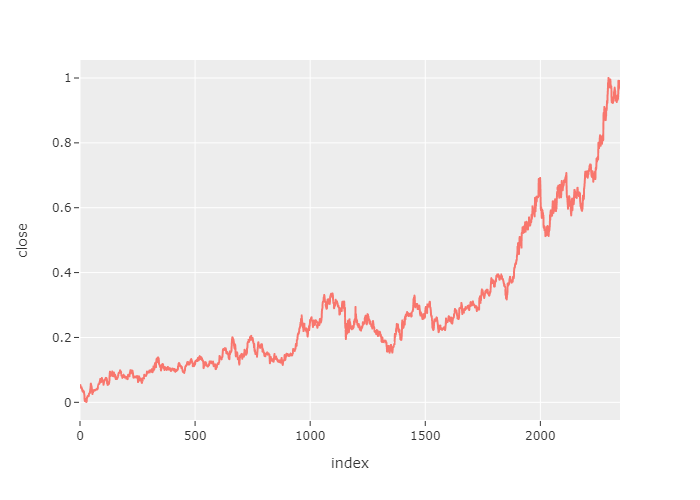

In [22]:
fig = px.line(train_data_minmax, y="close")
fig.show()

In [23]:
# Difference Transformation
# def difference(data, interval):
#     data1 = data.reset_index()
#     dif_data = []
#     for i in range(interval, len(data1)):
#         d = data1.loc[i] - data1.loc[i - interval]
#         dif_data.append(d)
        
#     dif_data = pd.DataFrame(dif_data, columns = data.columns)
#     return dif_data

In [24]:
# dif_data = difference(train_data_minmax, 1)
# dif_data

In [25]:
# fig = px.line(dif_data, y="close")
# fig.show()

In [26]:
# invert difference
def invert_difference(org_data_first_value, diff_data, interval):
    data1 = diff_data.reset_index()
    org_data1 = org_data_first_value
    orgnl_data = []
    for i in range(interval, len(data1)):
        d = diff_data.loc[i-interval] + org_data1
        org_data1=d
        orgnl_data.append(d)
        
    orgnl_data = pd.DataFrame(orgnl_data, columns = diff_data.columns)
    orgnl_data.index = diff_data.index[:len(orgnl_data)]
    return orgnl_data

In [27]:
#invert_difference(train_data_minmax.loc[0], dif_data, 1)

In [28]:
#train_data_minmax

In [29]:
train_data_minmax.index = train_data.index
train_data_minmax

,close
Date,
2011-01-03,0.048126
2011-01-04,0.052263
2011-01-05,0.052957
2011-01-06,0.047974
2011-01-07,0.044719
...,...
2019-12-25,0.968929
2019-12-26,0.970024
2019-12-27,0.975388


In [30]:
# dif_data.index = train_data.index[1:]
# dif_data

# Model Building

In [31]:
from sktime.forecasting.compose import AutoEnsembleForecaster

In [32]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet

In [33]:
Expo_model = ExponentialSmoothing(trend='add',seasonal='mul',sp=262, damped_trend=False)
Expo_model.fit(train_data_minmax)

ExponentialSmoothing(seasonal='mul', sp=262, trend='add')

In [34]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictions_minmax = Expo_model.predict(fh=fh)
test_predictions_minmax

,close
2020-01-01,0.972956
2020-01-02,0.971759
2020-01-03,0.975012
2020-01-06,0.986249
2020-01-07,0.963524
...,...
2022-06-24,1.423850
2022-06-27,1.414741
2022-06-28,1.427781
2022-06-29,1.437267


In [35]:
test_predictions=scaler.inverse_transform(test_predictions_minmax)
test_predictions = pd.DataFrame(test_predictions, columns = ['Close'])
test_predictions.index = test_data.index
test_predictions

,Close
Date,
2020-01-01,14076.273079
2020-01-02,14062.353619
2020-01-03,14100.202677
2020-01-06,14230.986508
2020-01-07,13966.510294
...,...
2022-06-24,19323.812388
2022-06-27,19217.802729
2022-06-28,19369.561197


In [36]:
#fig = go.Figure()

# fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
# fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
# fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['Close'], mode='lines', name='PREDICTION'))

# fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
# fig.show()

In [37]:
#mse, rmse = error(test_data['Close'],test_predictions)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import holidays
import random

In [39]:
holiday = pd.DataFrame([])

for date, name in sorted(holidays.India(years=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "India_Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [40]:
holiday = holiday[:-4]
holiday

,ds,holiday
0,2011-01-14,India_Holidays
1,2011-01-26,India_Holidays
2,2011-03-19,India_Holidays
3,2011-05-01,India_Holidays
4,2011-08-15,India_Holidays
...,...,...
87,2021-12-25,India_Holidays
88,2022-01-14,India_Holidays
89,2022-01-26,India_Holidays
90,2022-03-18,India_Holidays


In [41]:
from sklearn.model_selection import ParameterGrid
params_grid = {'changepoint_prior_scale':[0.05,1,10,25],
               'n_changepoints' : [1,10,25,100],
               'seasonality_prior_scale':[0.05,1,10,25]}

grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 64


In [42]:
model_parameters = pd.DataFrame(columns = ['Parameters','MSE','RMSE'])
i = 1
for p in grid:
    test = pd.DataFrame()
    print(i,' ',p)
    i = i+1
    random.seed(0)
    train_model =Prophet(freq='B', 
                         changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = 'multiplicative',
                         seasonality_prior_scale=p['seasonality_prior_scale'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         add_country_holidays={'country_name': 'India'}, holidays=holiday)
    train_model.fit(train_data_minmax)
    fh = list(range(1,653))
    test_predictions = train_model.predict(fh=fh)
    test_predictions=scaler.inverse_transform(test_predictions)
    mse, rmse = error(test_data['Close'],test_predictions)
    print('Root Mean Squre Error(RMSE)------------------------------------',rmse)
    model_parameters = model_parameters.append({'Parameters':p, 'MSE':mse, 'RMSE':rmse},ignore_index=True)

1   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:31:50 - cmdstanpy - INFO - Chain [1] start processing
17:31:50 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3809775.355573516
RMSE :  1951.8645843330207 

Root Mean Squre Error(RMSE)------------------------------------ 1951.8645843330207
2   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:31:54 - cmdstanpy - INFO - Chain [1] start processing
17:31:55 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3803838.7105048974
RMSE :  1950.3432288971337 

Root Mean Squre Error(RMSE)------------------------------------ 1950.3432288971337
3   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:31:58 - cmdstanpy - INFO - Chain [1] start processing
17:31:58 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3807446.442933207
RMSE :  1951.2679064990555 

Root Mean Squre Error(RMSE)------------------------------------ 1951.2679064990555
4   {'changepoint_prior_scale': 0.05, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:32:01 - cmdstanpy - INFO - Chain [1] start processing
17:32:01 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3803741.384792415
RMSE :  1950.3182778183707 

Root Mean Squre Error(RMSE)------------------------------------ 1950.3182778183707
5   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:32:04 - cmdstanpy - INFO - Chain [1] start processing
17:32:04 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2340762.6685932428
RMSE :  1529.9551197970623 

Root Mean Squre Error(RMSE)------------------------------------ 1529.9551197970623
6   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:32:07 - cmdstanpy - INFO - Chain [1] start processing
17:32:08 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2331137.585669027
RMSE :  1526.8063353513526 

Root Mean Squre Error(RMSE)------------------------------------ 1526.8063353513526
7   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:32:14 - cmdstanpy - INFO - Chain [1] start processing
17:32:15 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2333999.786940407
RMSE :  1527.7433642272536 

Root Mean Squre Error(RMSE)------------------------------------ 1527.7433642272536
8   {'changepoint_prior_scale': 0.05, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:32:23 - cmdstanpy - INFO - Chain [1] start processing
17:32:24 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2333974.0837061335
RMSE :  1527.7349520470275 

Root Mean Squre Error(RMSE)------------------------------------ 1527.7349520470275
9   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:32:28 - cmdstanpy - INFO - Chain [1] start processing
17:32:30 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2339130.5421969234
RMSE :  1529.4216365008451 

Root Mean Squre Error(RMSE)------------------------------------ 1529.4216365008451
10   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:32:35 - cmdstanpy - INFO - Chain [1] start processing
17:32:39 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2346327.3178911367
RMSE :  1531.7726064566948 

Root Mean Squre Error(RMSE)------------------------------------ 1531.7726064566948
11   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:32:42 - cmdstanpy - INFO - Chain [1] start processing
17:32:42 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2341758.3617265807
RMSE :  1530.280484658476 

Root Mean Squre Error(RMSE)------------------------------------ 1530.280484658476
12   {'changepoint_prior_scale': 0.05, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:32:45 - cmdstanpy - INFO - Chain [1] start processing
17:32:46 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2343589.234986486
RMSE :  1530.8785827055278 

Root Mean Squre Error(RMSE)------------------------------------ 1530.8785827055278
13   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:32:49 - cmdstanpy - INFO - Chain [1] start processing
17:32:54 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2346958.2539093276
RMSE :  1531.978542248333 

Root Mean Squre Error(RMSE)------------------------------------ 1531.978542248333
14   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:32:58 - cmdstanpy - INFO - Chain [1] start processing
17:33:05 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2348309.2704372876
RMSE :  1532.4194172736418 

Root Mean Squre Error(RMSE)------------------------------------ 1532.4194172736418
15   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:33:10 - cmdstanpy - INFO - Chain [1] start processing
17:33:18 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2348366.3858117266
RMSE :  1532.4380528464199 

Root Mean Squre Error(RMSE)------------------------------------ 1532.4380528464199
16   {'changepoint_prior_scale': 0.05, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:33:22 - cmdstanpy - INFO - Chain [1] start processing
17:33:27 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2346913.083655208
RMSE :  1531.9637997208706 

Root Mean Squre Error(RMSE)------------------------------------ 1531.9637997208706
17   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:33:31 - cmdstanpy - INFO - Chain [1] start processing
17:33:31 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3904823.9229808645
RMSE :  1976.0627325519968 

Root Mean Squre Error(RMSE)------------------------------------ 1976.0627325519968
18   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:33:33 - cmdstanpy - INFO - Chain [1] start processing
17:33:33 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3899184.9024207415
RMSE :  1974.6353846775717 

Root Mean Squre Error(RMSE)------------------------------------ 1974.6353846775717
19   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:33:35 - cmdstanpy - INFO - Chain [1] start processing
17:33:35 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3900771.7969342135
RMSE :  1975.0371634311628 

Root Mean Squre Error(RMSE)------------------------------------ 1975.0371634311628
20   {'changepoint_prior_scale': 1, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:33:37 - cmdstanpy - INFO - Chain [1] start processing
17:33:37 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3898978.453939697
RMSE :  1974.5831088965836 

Root Mean Squre Error(RMSE)------------------------------------ 1974.5831088965836
21   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:33:39 - cmdstanpy - INFO - Chain [1] start processing
17:33:40 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2323873.557873761
RMSE :  1524.4256485226692 

Root Mean Squre Error(RMSE)------------------------------------ 1524.4256485226692
22   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:33:42 - cmdstanpy - INFO - Chain [1] start processing
17:33:43 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2326754.8627659995
RMSE :  1525.3704018257336 

Root Mean Squre Error(RMSE)------------------------------------ 1525.3704018257336
23   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:33:45 - cmdstanpy - INFO - Chain [1] start processing
17:33:46 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325495.962914626
RMSE :  1524.9576921720243 

Root Mean Squre Error(RMSE)------------------------------------ 1524.9576921720243
24   {'changepoint_prior_scale': 1, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:33:48 - cmdstanpy - INFO - Chain [1] start processing
17:33:49 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2326466.876019075
RMSE :  1525.2759999485586 

Root Mean Squre Error(RMSE)------------------------------------ 1525.2759999485586
25   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:33:51 - cmdstanpy - INFO - Chain [1] start processing
17:33:54 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2571323.2221117574
RMSE :  1603.5346027173089 

Root Mean Squre Error(RMSE)------------------------------------ 1603.5346027173089
26   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:33:57 - cmdstanpy - INFO - Chain [1] start processing
17:33:59 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2572102.552119297
RMSE :  1603.7775881085558 

Root Mean Squre Error(RMSE)------------------------------------ 1603.7775881085558
27   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:34:02 - cmdstanpy - INFO - Chain [1] start processing
17:34:05 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2576078.916455384
RMSE :  1605.0167963156598 

Root Mean Squre Error(RMSE)------------------------------------ 1605.0167963156598
28   {'changepoint_prior_scale': 1, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:34:07 - cmdstanpy - INFO - Chain [1] start processing
17:34:12 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2580140.6484408835
RMSE :  1606.281621771501 

Root Mean Squre Error(RMSE)------------------------------------ 1606.281621771501
29   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:34:15 - cmdstanpy - INFO - Chain [1] start processing
17:34:44 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2784454.533300994
RMSE :  1668.668491133273 

Root Mean Squre Error(RMSE)------------------------------------ 1668.668491133273
30   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:34:48 - cmdstanpy - INFO - Chain [1] start processing
17:35:15 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2785052.0339319166
RMSE :  1668.847516680873 

Root Mean Squre Error(RMSE)------------------------------------ 1668.847516680873
31   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:35:19 - cmdstanpy - INFO - Chain [1] start processing
17:35:39 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2798094.850594255
RMSE :  1672.7506839317853 

Root Mean Squre Error(RMSE)------------------------------------ 1672.7506839317853
32   {'changepoint_prior_scale': 1, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:35:43 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2776879.061133444
RMSE :  1666.3970298621646 

Root Mean Squre Error(RMSE)------------------------------------ 1666.3970298621646
33   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:36:20 - cmdstanpy - INFO - Chain [1] start processing
17:36:21 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3905402.2638204787
RMSE :  1976.209063793727 

Root Mean Squre Error(RMSE)------------------------------------ 1976.209063793727
34   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:36:23 - cmdstanpy - INFO - Chain [1] start processing
17:36:23 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3905549.266543574
RMSE :  1976.2462565539686 

Root Mean Squre Error(RMSE)------------------------------------ 1976.2462565539686
35   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:36:26 - cmdstanpy - INFO - Chain [1] start processing
17:36:26 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3901983.927086812
RMSE :  1975.3440022150096 

Root Mean Squre Error(RMSE)------------------------------------ 1975.3440022150096
36   {'changepoint_prior_scale': 10, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:36:29 - cmdstanpy - INFO - Chain [1] start processing
17:36:29 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3905148.9524767487
RMSE :  1976.1449725353525 

Root Mean Squre Error(RMSE)------------------------------------ 1976.1449725353525
37   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:36:32 - cmdstanpy - INFO - Chain [1] start processing
17:36:32 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2323034.9950554008
RMSE :  1524.1505814897034 

Root Mean Squre Error(RMSE)------------------------------------ 1524.1505814897034
38   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:36:35 - cmdstanpy - INFO - Chain [1] start processing
17:36:36 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325013.3280109037
RMSE :  1524.7994386183725 

Root Mean Squre Error(RMSE)------------------------------------ 1524.7994386183725
39   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:36:39 - cmdstanpy - INFO - Chain [1] start processing
17:36:40 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325221.9798976737
RMSE :  1524.867856536321 

Root Mean Squre Error(RMSE)------------------------------------ 1524.867856536321
40   {'changepoint_prior_scale': 10, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:36:43 - cmdstanpy - INFO - Chain [1] start processing
17:36:43 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2326061.8805470965
RMSE :  1525.1432327972007 

Root Mean Squre Error(RMSE)------------------------------------ 1525.1432327972007
41   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:36:46 - cmdstanpy - INFO - Chain [1] start processing
17:36:48 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2571304.988332123
RMSE :  1603.5289172110752 

Root Mean Squre Error(RMSE)------------------------------------ 1603.5289172110752
42   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:36:51 - cmdstanpy - INFO - Chain [1] start processing
17:36:56 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2588163.7611268642
RMSE :  1608.777101132057 

Root Mean Squre Error(RMSE)------------------------------------ 1608.777101132057
43   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:37:00 - cmdstanpy - INFO - Chain [1] start processing
17:37:04 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2587746.910328545
RMSE :  1608.6475407399053 

Root Mean Squre Error(RMSE)------------------------------------ 1608.6475407399053
44   {'changepoint_prior_scale': 10, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:37:08 - cmdstanpy - INFO - Chain [1] start processing
17:37:12 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2583774.0733418697
RMSE :  1607.4122288143355 

Root Mean Squre Error(RMSE)------------------------------------ 1607.4122288143355
45   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:37:15 - cmdstanpy - INFO - Chain [1] start processing
17:37:51 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2821372.13346997
RMSE :  1679.6940594852297 

Root Mean Squre Error(RMSE)------------------------------------ 1679.6940594852297
46   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:37:55 - cmdstanpy - INFO - Chain [1] start processing
17:38:17 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2803950.611045496
RMSE :  1674.5001078069527 

Root Mean Squre Error(RMSE)------------------------------------ 1674.5001078069527
47   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:38:21 - cmdstanpy - INFO - Chain [1] start processing
17:38:48 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2831790.6123827454
RMSE :  1682.7925042567624 

Root Mean Squre Error(RMSE)------------------------------------ 1682.7925042567624
48   {'changepoint_prior_scale': 10, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:38:52 - cmdstanpy - INFO - Chain [1] start processing
17:39:30 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2853054.3700001556
RMSE :  1689.0986856901393 

Root Mean Squre Error(RMSE)------------------------------------ 1689.0986856901393
49   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 0.05}


17:39:34 - cmdstanpy - INFO - Chain [1] start processing
17:39:34 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3909385.4546688125
RMSE :  1977.2165927557892 

Root Mean Squre Error(RMSE)------------------------------------ 1977.2165927557892
50   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 1}


17:39:37 - cmdstanpy - INFO - Chain [1] start processing
17:39:37 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3906008.692767743
RMSE :  1976.362490224843 

Root Mean Squre Error(RMSE)------------------------------------ 1976.362490224843
51   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 10}


17:39:40 - cmdstanpy - INFO - Chain [1] start processing
17:39:40 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3907466.2934701894
RMSE :  1976.7312142702126 

Root Mean Squre Error(RMSE)------------------------------------ 1976.7312142702126
52   {'changepoint_prior_scale': 25, 'n_changepoints': 1, 'seasonality_prior_scale': 25}


17:39:43 - cmdstanpy - INFO - Chain [1] start processing
17:39:43 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  3907000.01160531
RMSE :  1976.6132680940168 

Root Mean Squre Error(RMSE)------------------------------------ 1976.6132680940168
53   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 0.05}


17:39:46 - cmdstanpy - INFO - Chain [1] start processing
17:39:47 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2324312.04868448
RMSE :  1524.5694633844928 

Root Mean Squre Error(RMSE)------------------------------------ 1524.5694633844928
54   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 1}


17:39:50 - cmdstanpy - INFO - Chain [1] start processing
17:39:50 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2325747.266856379
RMSE :  1525.040086967021 

Root Mean Squre Error(RMSE)------------------------------------ 1525.040086967021
55   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 10}


17:39:53 - cmdstanpy - INFO - Chain [1] start processing
17:39:54 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2324330.829242498
RMSE :  1524.5756226709445 

Root Mean Squre Error(RMSE)------------------------------------ 1524.5756226709445
56   {'changepoint_prior_scale': 25, 'n_changepoints': 10, 'seasonality_prior_scale': 25}


17:39:57 - cmdstanpy - INFO - Chain [1] start processing
17:39:57 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2324593.759535049
RMSE :  1524.6618508820404 

Root Mean Squre Error(RMSE)------------------------------------ 1524.6618508820404
57   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 0.05}


17:40:00 - cmdstanpy - INFO - Chain [1] start processing
17:40:04 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2578392.8853432685
RMSE :  1605.7374895490448 

Root Mean Squre Error(RMSE)------------------------------------ 1605.7374895490448
58   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 1}


17:40:07 - cmdstanpy - INFO - Chain [1] start processing
17:40:12 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2582804.877533609
RMSE :  1607.1107234828623 

Root Mean Squre Error(RMSE)------------------------------------ 1607.1107234828623
59   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 10}


17:40:15 - cmdstanpy - INFO - Chain [1] start processing
17:40:19 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2579904.164689643
RMSE :  1606.2080079148038 

Root Mean Squre Error(RMSE)------------------------------------ 1606.2080079148038
60   {'changepoint_prior_scale': 25, 'n_changepoints': 25, 'seasonality_prior_scale': 25}


17:40:22 - cmdstanpy - INFO - Chain [1] start processing
17:40:27 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2584517.134116628
RMSE :  1607.643347921618 

Root Mean Squre Error(RMSE)------------------------------------ 1607.643347921618
61   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 0.05}


17:40:30 - cmdstanpy - INFO - Chain [1] start processing
17:41:07 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2822696.3454476804
RMSE :  1680.0881957348788 

Root Mean Squre Error(RMSE)------------------------------------ 1680.0881957348788
62   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 1}


17:41:11 - cmdstanpy - INFO - Chain [1] start processing
17:41:32 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2827787.7023943793
RMSE :  1681.602718359595 

Root Mean Squre Error(RMSE)------------------------------------ 1681.602718359595
63   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 10}


17:41:36 - cmdstanpy - INFO - Chain [1] start processing
17:42:04 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2833768.514631023
RMSE :  1683.3800862048427 

Root Mean Squre Error(RMSE)------------------------------------ 1683.3800862048427
64   {'changepoint_prior_scale': 25, 'n_changepoints': 100, 'seasonality_prior_scale': 25}


17:42:09 - cmdstanpy - INFO - Chain [1] start processing
17:42:55 - cmdstanpy - INFO - Chain [1] done processing


Errors :-
MSE :  2861036.253824381
RMSE :  1691.4597996477426 

Root Mean Squre Error(RMSE)------------------------------------ 1691.4597996477426


In [43]:
len(grid)

64

In [44]:
parameters = model_parameters.sort_values(by=['RMSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,Parameters,MSE,RMSE
0,"{'changepoint_prior_scale': 10, 'n_changepoint...",2.323035e+06,1524.150581
1,"{'changepoint_prior_scale': 1, 'n_changepoints...",2.323874e+06,1524.425649
2,"{'changepoint_prior_scale': 25, 'n_changepoint...",2.324312e+06,1524.569463
3,"{'changepoint_prior_scale': 25, 'n_changepoint...",2.324331e+06,1524.575623
4,"{'changepoint_prior_scale': 25, 'n_changepoint...",2.324594e+06,1524.661851


In [45]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 10,
 'n_changepoints': 10,
 'seasonality_prior_scale': 0.05}

In [46]:
Pro_model = Prophet(freq='B', seasonality_mode='multiplicative', 
                    changepoint_prior_scale=parameters['Parameters'][0]['changepoint_prior_scale'], 
                    n_changepoints=parameters['Parameters'][0]['n_changepoints'], 
                    seasonality_prior_scale=parameters['Parameters'][0]['seasonality_prior_scale'], 
                    add_country_holidays={'country_name': 'India'}, verbose=10,
                    holidays=holiday,
                    yearly_seasonality=True, weekly_seasonality=False , daily_seasonality=False)
Pro_model.fit(train_data_minmax)

17:43:00 - cmdstanpy - INFO - Chain [1] start processing
17:43:01 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'India'},
        changepoint_prior_scale=10, daily_seasonality=False, freq='B',
        holidays=           ds         holiday
0  2011-01-14  India_Holidays
1  2011-01-26  India_Holidays
2  2011-03-19  India_Holidays
3  2011-05-01  India_Holidays
4  2011-08-15  India_Holidays
..        ...             ...
87 2021-12-25  India_Holidays
88 2022-01-14  India_Holidays
89 2022-01-26  India_Holidays
90 2022-03-18  India_Holidays
91 2022-05-01  India_Holidays

[92 rows x 2 columns],
        n_changepoints=10, seasonality_mode='multiplicative',
        seasonality_prior_scale=0.05, verbose=10, weekly_seasonality=False,
        yearly_seasonality=True)

In [47]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictions_minmax = Pro_model.predict(fh=fh)
test_predictions_minmax

,yhat
2020-01-01,0.901480
2020-01-02,0.900033
2020-01-03,0.898457
2020-01-06,0.894617
2020-01-07,0.893691
...,...
2022-06-24,1.471399
2022-06-27,1.475095
2022-06-28,1.476516
2022-06-29,1.477992


In [48]:
test_predictions=scaler.inverse_transform(test_predictions_minmax)
test_predictions = pd.DataFrame(test_predictions, columns = ['Close'])
test_predictions.index = test_data.index
test_predictions

,Close
Date,
2020-01-01,13244.437052
2020-01-02,13227.590719
2020-01-03,13209.252399
2020-01-06,13164.565496
2020-01-07,13153.789244
...,...
2022-06-24,19877.187439
2022-06-27,19920.204556
2022-06-28,19936.748790


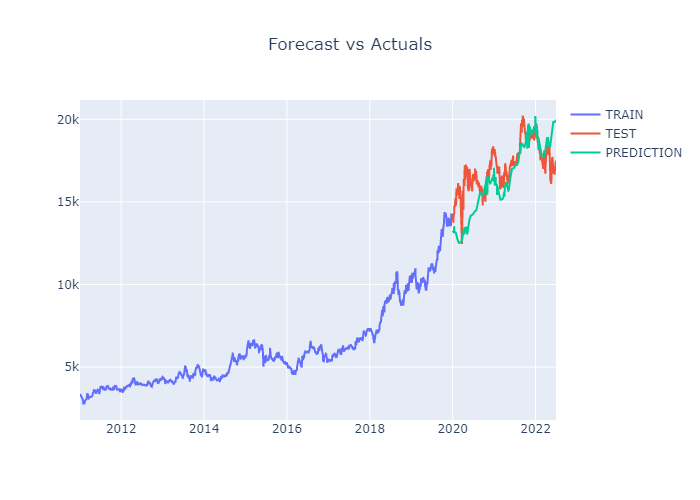

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['Close'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

# Auto Ensemble Forecaster

In [50]:
from sktime.forecasting.compose import AutoEnsembleForecaster

In [51]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet

In [52]:
Pro_model = Prophet(freq='B', seasonality_mode='multiplicative', 
                    changepoint_prior_scale=25, 
                    n_changepoints=10, 
                    seasonality_prior_scale=0.05, 
                    add_country_holidays={'country_name': 'India'}, verbose=10,
                    holidays=holiday,
                    yearly_seasonality=True, weekly_seasonality=False , daily_seasonality=False)
# Pro_model.fit(train_data)

In [53]:
Expo_model = ExponentialSmoothing(trend='add',seasonal='mul',sp=262, damped_trend=False)
# Expo_model.fit(train_data_minmax)

In [54]:
forecasters = [
    ("prophet" , Pro_model),
    ("expo" , Expo_model)
]

In [55]:
Ensmodel = AutoEnsembleForecaster(forecasters=forecasters, n_jobs=-1, random_state=42)
Ensmodel.fit(train_data_minmax)

AutoEnsembleForecaster(forecasters=[('prophet',
                                     Prophet(add_country_holidays={'country_name': 'India'},
                                             changepoint_prior_scale=25,
                                             daily_seasonality=False, freq='B',
                                             holidays=           ds         holiday
0  2011-01-14  India_Holidays
1  2011-01-26  India_Holidays
2  2011-03-19  India_Holidays
3  2011-05-01  India_Holidays
4  2011-08-15  India_Holidays
..        ...             ...
87 2021-12-25  India_Holidays
88 2022-01-14  India_Holidays
89 2022-01-26  India_Holidays
90 2022-03-18  India_Holidays
91 2022-05-01  India_Holidays

[92 rows x 2 columns],
                                             n_changepoints=10,
                                             seasonality_mode='multiplicative',
                                             seasonality_prior_scale=0.05,
                                             verbose=10,
                                             weekly_seasonality=False,
                                             yearly_seasonality=True)),
                                    ('expo',
                                     ExponentialSmoothing(seasonal='mul',
                                                          sp=262,
                                                          trend='add'))],
                       n_jobs=-1, random_state=42)

In [56]:
fh = list(range(1,653))
# fh1 = pd.DatetimeIndex(np.array(test_data.index))
# fh1
test_predictionsEns = Ensmodel.predict(fh=fh)
test_predictionsEns

,close
2020-01-01,0.963721
2020-01-02,0.962498
2020-01-03,0.965125
2020-01-06,0.974414
2020-01-07,0.954501
...,...
2022-06-24,1.429948
2022-06-27,1.422494
2022-06-28,1.434035
2022-06-29,1.442487


In [57]:
test_predictions=scaler.inverse_transform(test_predictionsEns)
test_predictions = pd.DataFrame(test_predictions, columns = ['Close'])
test_predictions.index = test_data.index
test_predictions

,Close
Date,
2020-01-01,13968.804582
2020-01-02,13954.562060
2020-01-03,13985.146483
2020-01-06,14093.245601
2020-01-07,13861.503300
...,...
2022-06-24,19394.781939
2022-06-27,19308.032594
2022-06-28,19442.344662


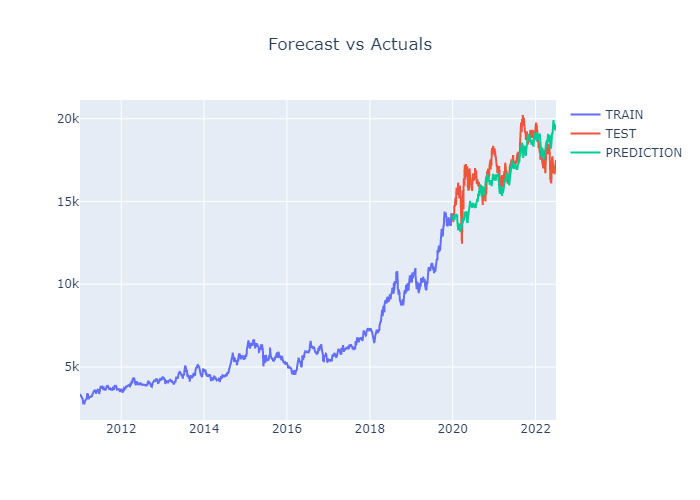

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Close'], mode='lines', name='TRAIN'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Close'], mode='lines', name='TEST'))
fig.add_trace(go.Scatter(x=test_predictions.index, y=test_predictions['Close'], mode='lines', name='PREDICTION'))

fig.update_layout(title_text='Forecast vs Actuals', title_x=0.5)
fig.show()

In [59]:
mse, rmse = error(test_data['Close'],test_predictions)

Errors :-
MSE :  1524639.5937365696
RMSE :  1234.7629706695004 

